In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv('../heartDiseaseCleaned.csv')

In [4]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40.0,1,2,140.0,289.0,0,0,172.0,0,0.0,1,0
1,49.0,0,3,160.0,180.0,0,0,156.0,0,1.0,2,1
2,37.0,1,2,130.0,283.0,0,1,98.0,0,0.0,1,0
3,48.0,0,4,138.0,214.0,0,0,108.0,1,1.5,2,1
4,54.0,1,3,150.0,195.0,0,0,122.0,0,0.0,1,0


In [5]:
df.tail()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
1185,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,1
1186,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,1
1187,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1
1188,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1
1189,38.0,1,3,138.0,175.0,0,0,173.0,0,0.0,1,0


In [6]:
#Replace Invalid Zeros with NaN
# Cholesterol: 0 is impossible (172 rows affected)
df.loc[df['cholesterol'] == 0, 'cholesterol'] = np.nan

# Resting BP: 0 is impossible (5 rows affected)
df.loc[df['resting_bp_s'] == 0, 'resting_bp_s'] = np.nan

In [7]:
# Impute with median:
df['cholesterol'] = df['cholesterol'].fillna(df['cholesterol'].median())
df['resting_bp_s'] = df['resting_bp_s'].fillna(df['resting_bp_s'].median())

In [8]:
df[df['oldpeak'] < 0]  # Review these rows

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
322,63.0,1,4,100.0,240.0,1,0,109.0,0,-0.9,2,1
325,46.0,1,4,100.0,240.0,1,1,133.0,0,-2.6,2,1
326,42.0,1,4,105.0,240.0,1,0,128.0,1,-1.5,3,1
327,45.0,1,3,110.0,240.0,0,0,138.0,0,-0.1,1,0
332,56.0,1,4,115.0,240.0,1,1,82.0,0,-1.0,1,1
333,38.0,1,3,100.0,240.0,0,0,179.0,0,-1.1,1,0
335,51.0,1,4,130.0,240.0,1,0,170.0,0,-0.7,1,1
336,62.0,1,1,120.0,240.0,1,2,134.0,0,-0.8,2,1
353,56.0,1,4,120.0,240.0,0,1,100.0,1,-1.0,3,1
408,62.0,1,4,115.0,240.0,1,0,72.0,1,-0.5,2,1


In [9]:
discrete_features = [
    'sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 
    'exercise_angina', 'ST_slope', 'target'
]

for col in discrete_features:
    df[col] = df[col].astype(int)

print(df.dtypes)

age                    float64
sex                      int64
chest_pain_type          int64
resting_bp_s           float64
cholesterol            float64
fasting_blood_sugar      int64
resting_ecg              int64
max_heart_rate         float64
exercise_angina          int64
oldpeak                float64
ST_slope                 int64
target                   int64
dtype: object


In [10]:
df.to_csv('heartDiseaseCleaned.csv', index=False)
df.head()


,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40.0,1,2,140.0,289.0,0,0,172.0,0,0.0,1,0
1,49.0,0,3,160.0,180.0,0,0,156.0,0,1.0,2,1
2,37.0,1,2,130.0,283.0,0,1,98.0,0,0.0,1,0
3,48.0,0,4,138.0,214.0,0,0,108.0,1,1.5,2,1
4,54.0,1,3,150.0,195.0,0,0,122.0,0,0.0,1,0


In [11]:
df = pd.read_csv('heartDiseaseCleaned.csv')
print(df.isnull().sum())

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
ST_slope               0
target                 0
dtype: int64


# **2. TARGET VARIABLE ANALYSIS**

In [12]:
# Display the distribution of the target variable
target_counts = df['target'].value_counts()
print(target_counts)

target
1    629
0    561
Name: count, dtype: int64


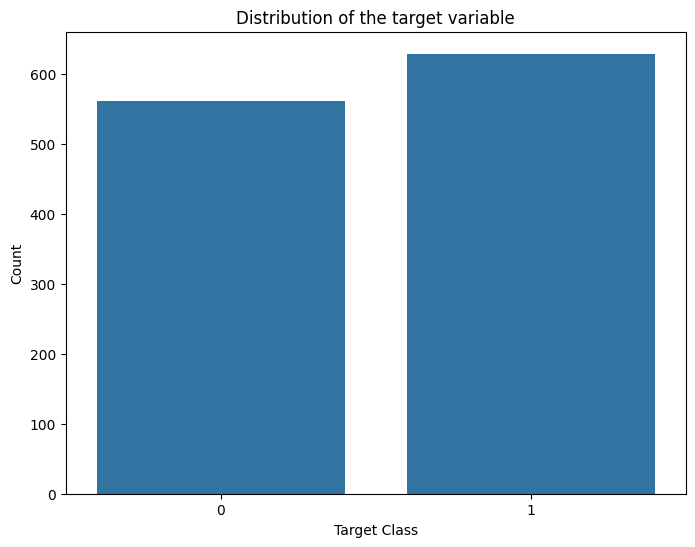

In [13]:

# Plot the distribution of the target variable
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=df)
plt.title('Distribution of the target variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

Numerical features: ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']
Categorical features: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'ST_slope']

Numerical Features Distribution:


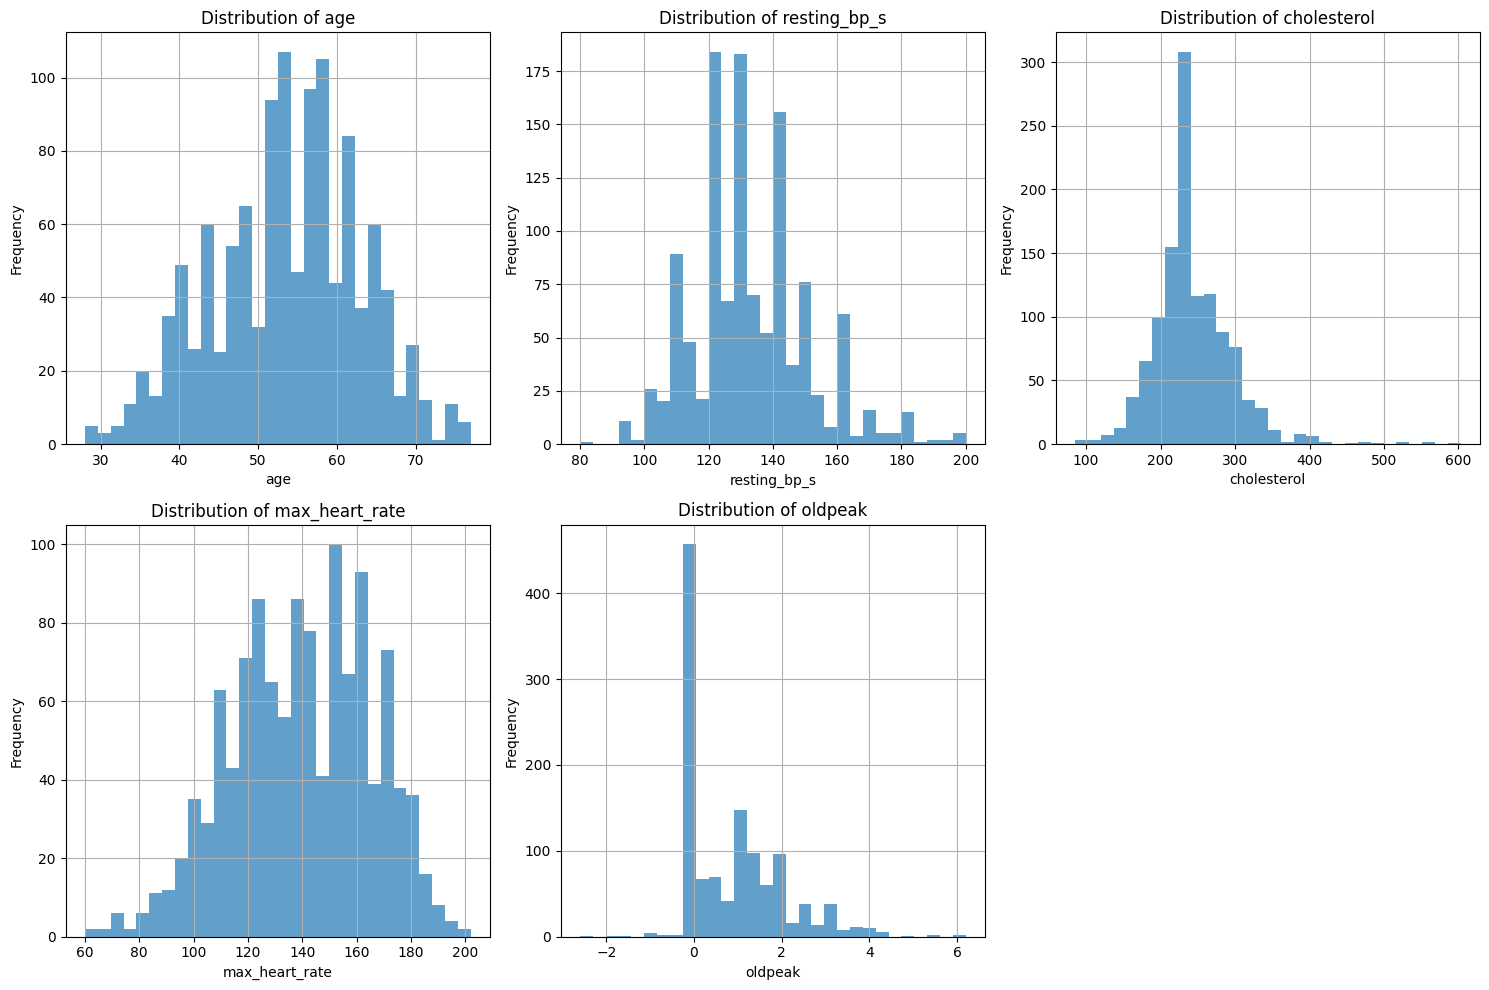

In [14]:

# Identify numerical and categorical features
numerical_features = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']
categorical_features = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 
                       'resting_ecg', 'exercise_angina', 'ST_slope']

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# Numerical distributions
print("\nNumerical Features Distribution:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    df[feature].hist(bins=30, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove empty subplot
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

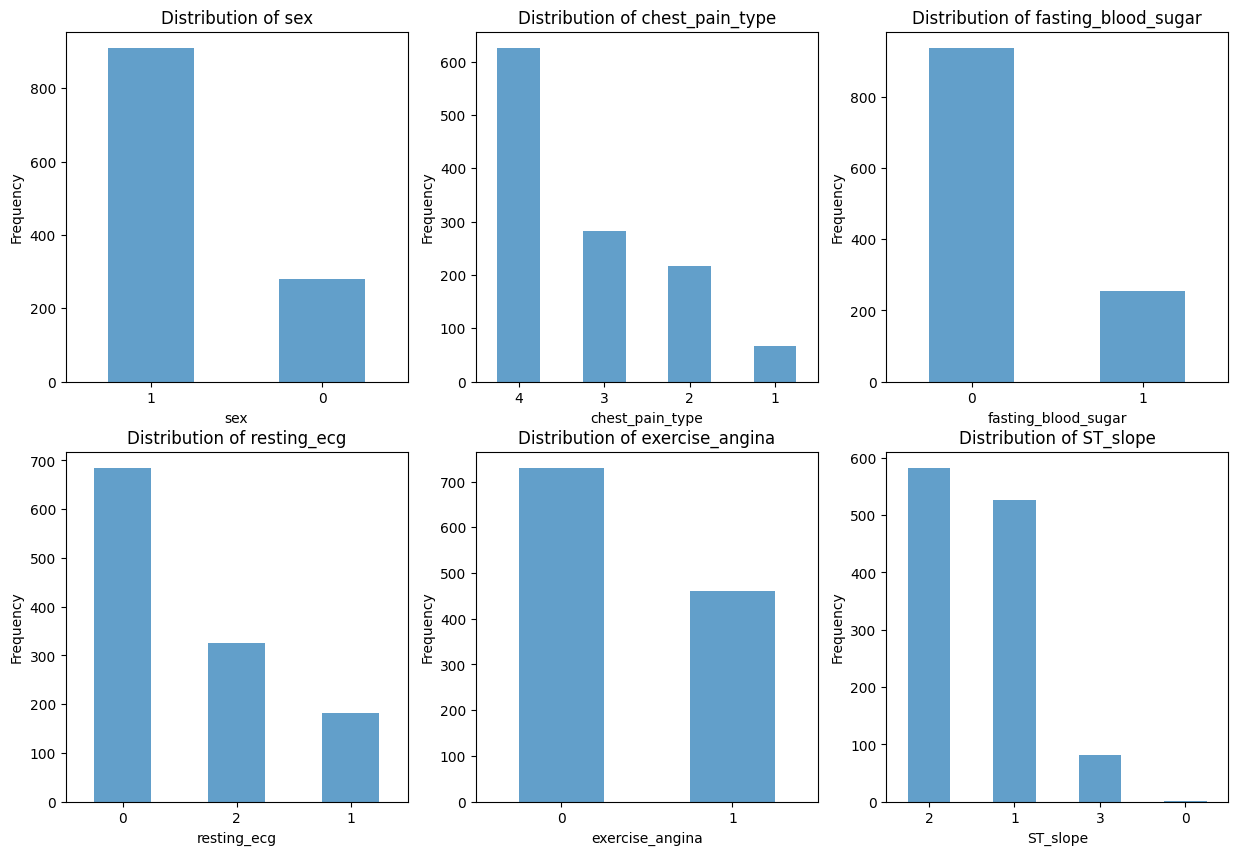

In [15]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i], alpha=0.7)
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=0)
plt.tight_layout
plt.show()


Numerical Features vs Target:


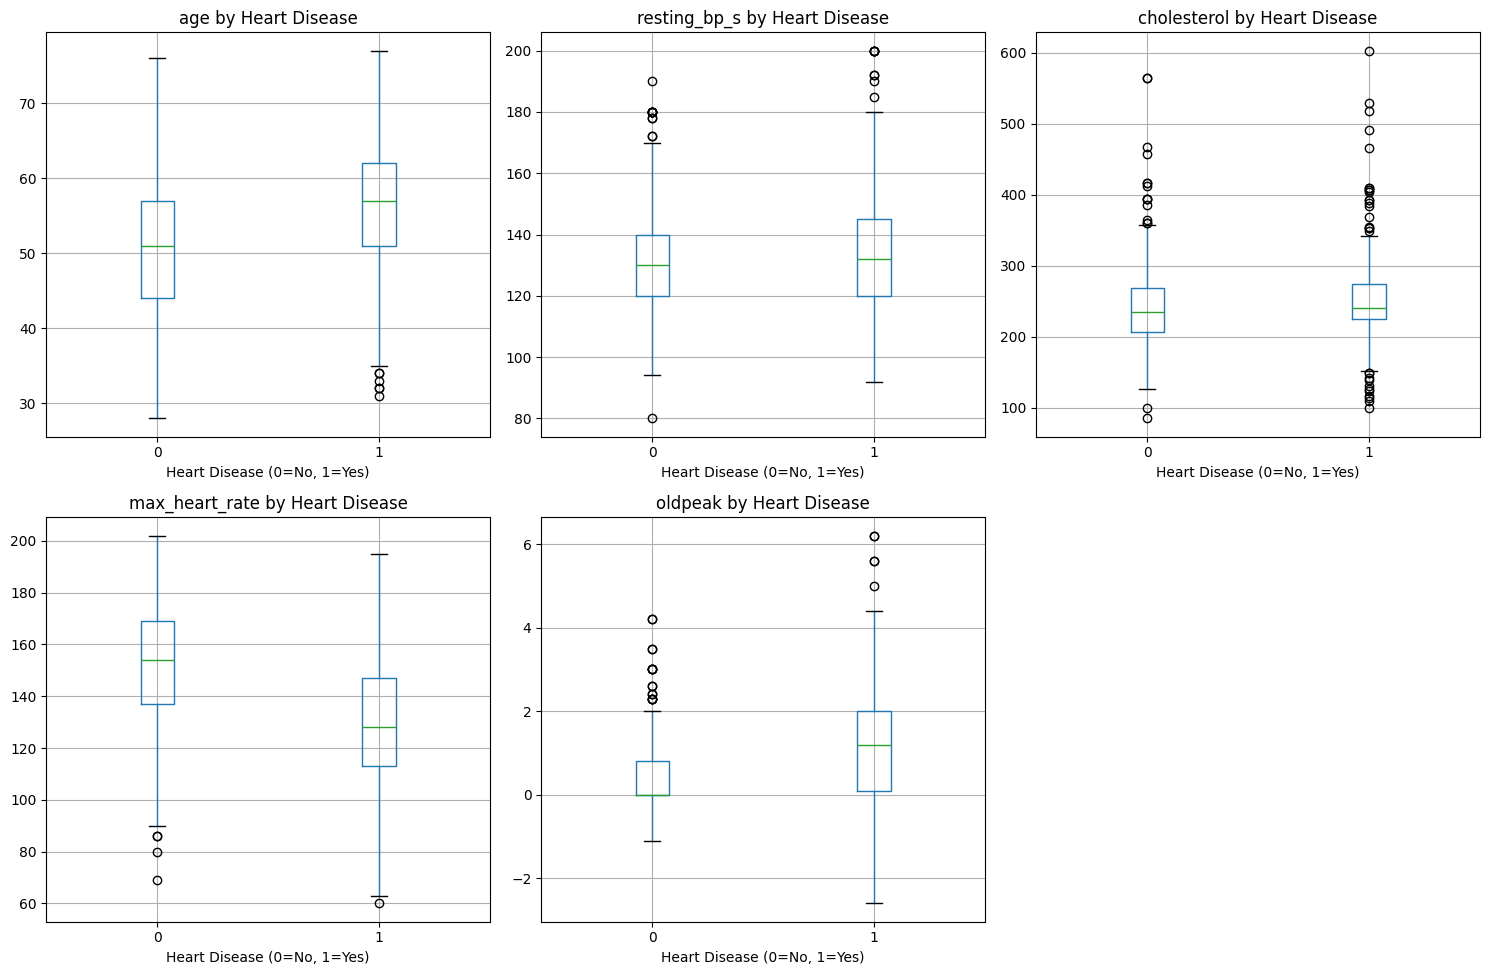

In [16]:
# Numerical vs Target
print("Numerical Features vs Target:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    df.boxplot(column=feature, by='target', ax=axes[i])
    axes[i].set_title(f'{feature} by Heart Disease')
    axes[i].set_xlabel('Heart Disease (0=No, 1=Yes)')

axes[-1].set_visible(False)
plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

Categorical Features vs Target:


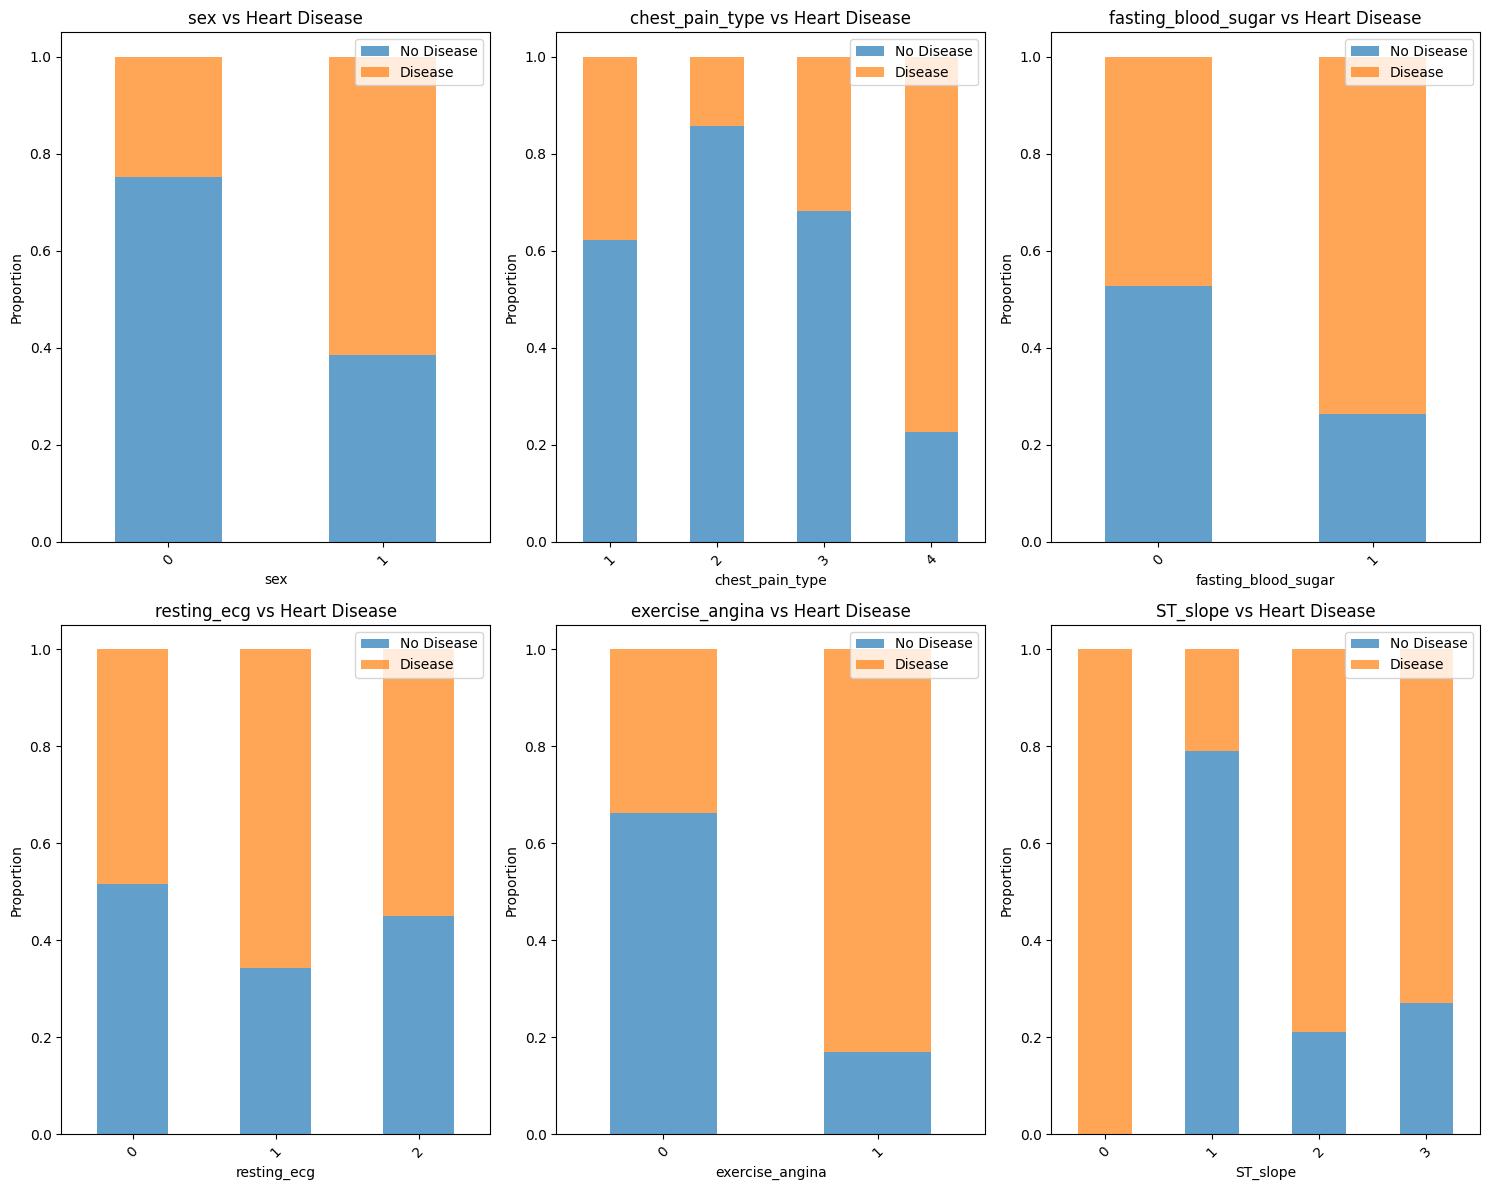

In [17]:


# Categorical vs Target
print("Categorical Features vs Target:")
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    pd.crosstab(df[feature], df['target'], normalize='index').plot(
        kind='bar', ax=axes[i], stacked=True, alpha=0.7
    )
    axes[i].set_title(f'{feature} vs Heart Disease')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(['No Disease', 'Disease'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

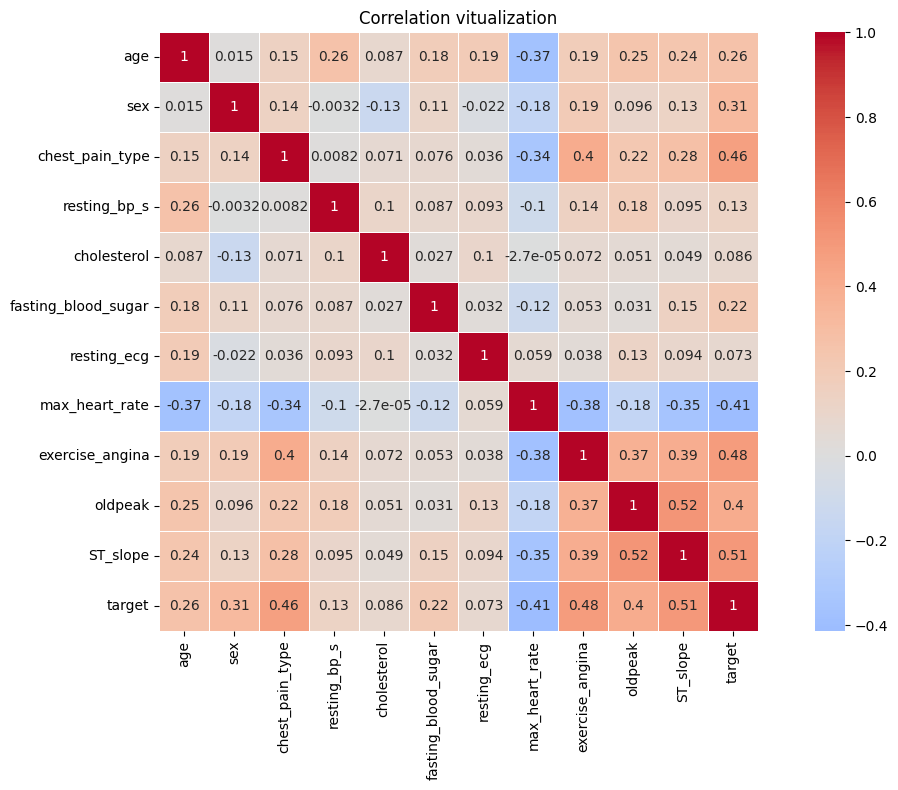

Correlation with target
target                 1.000000
ST_slope               0.505608
exercise_angina        0.481467
chest_pain_type        0.460127
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting_blood_sugar    0.216695
resting_bp_s           0.129894
cholesterol            0.086290
resting_ecg            0.073059
max_heart_rate        -0.413278
Name: target, dtype: float64


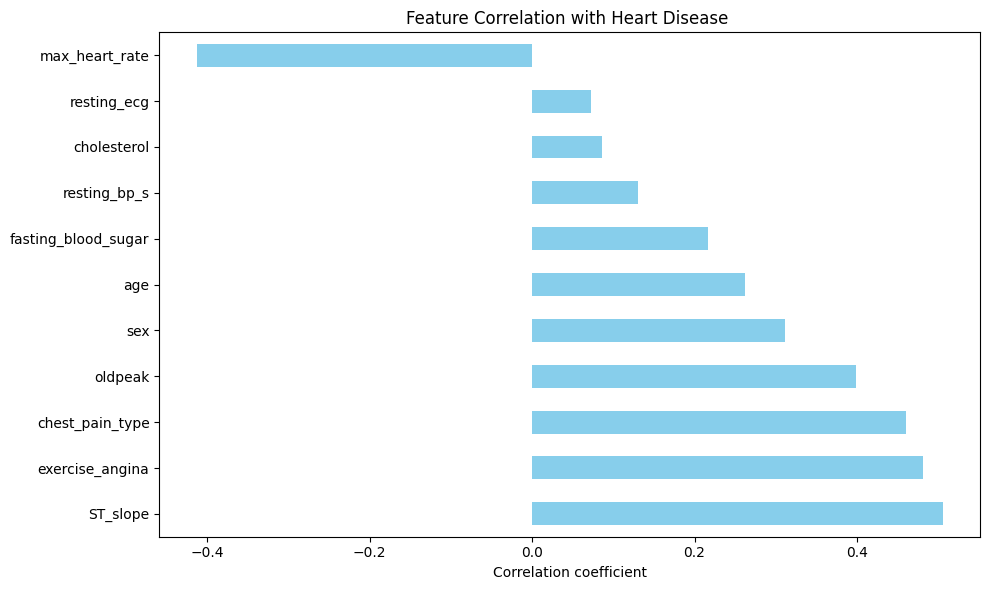

In [18]:
plt.figure(figsize=(12,8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation vitualization')
plt.tight_layout()
plt.show()

print('Correlation with target')
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
print(target_correlation)

plt.figure(figsize=(10,6))
target_correlation.drop('target').plot(kind='barh', color='skyblue')
plt.title('Feature Correlation with Heart Disease ')
plt.xlabel('Correlation coefficient')
plt.tight_layout()
plt.show()


In [20]:
df.isnull()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,False,False,False,False,False,False,False,False,False,False,False,False
1186,False,False,False,False,False,False,False,False,False,False,False,False
1187,False,False,False,False,False,False,False,False,False,False,False,False
1188,False,False,False,False,False,False,False,False,False,False,False,False
